In [1]:
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
import numpy as np
import pandas as pd
import os

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="sym", lin_comp = 0, noise=0.3, replicates = 3, noise_simple=0)
df2 = file_parser.generate_test_data(phase = 0, n_components = 1, name="sym_lin_comp", lin_comp = 0.1, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="asym", lin_comp = 0, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="asym_lin_comp", lin_comp = 0.1, noise=0.3, replicates = 3, noise_simple=0)
df = df.append(df2, ignore_index=True)


df2 = file_parser.generate_test_data(phase = 0, n_components = 1, name="sym_damped", amplification = -0.04, noise=0.3, replicates = 3, time_step=2, noise_simple=0, max_time = 72)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="sym_forced", amplification = 0.04, noise=0.3, replicates = 3, time_step=2, noise_simple=0, max_time = 72)
df = df.append(df2, ignore_index=True)


df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="asym_damped", amplification = -0.04, noise=0.3, replicates = 3, time_step=2, noise_simple=0,  max_time = 72)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="asym_forced", amplification = 0.04, noise=0.3, replicates = 3, time_step=2, noise_simple=0, max_time = 72)
df = df.append(df2, ignore_index=True)

Let us plot the data first:

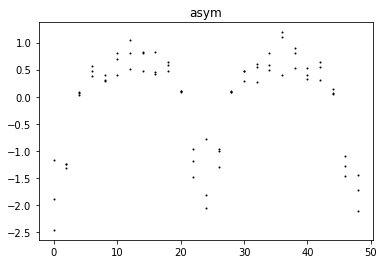

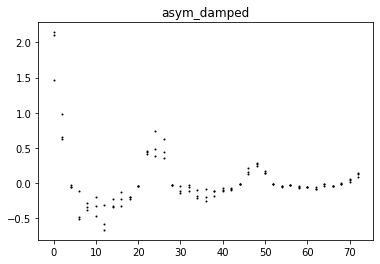

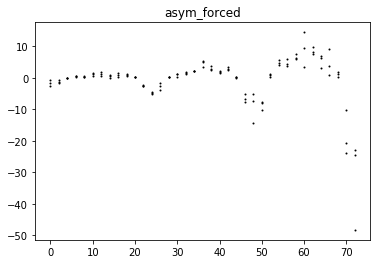

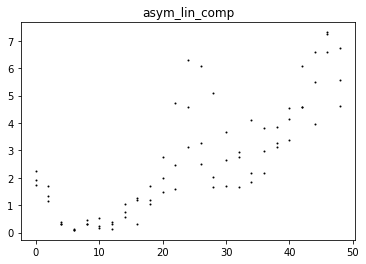

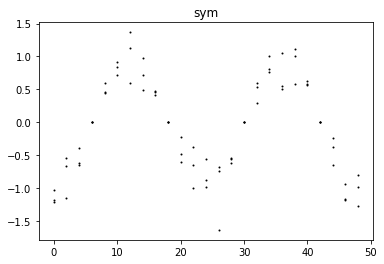

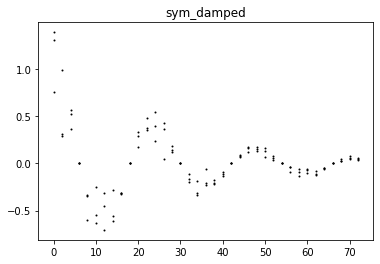

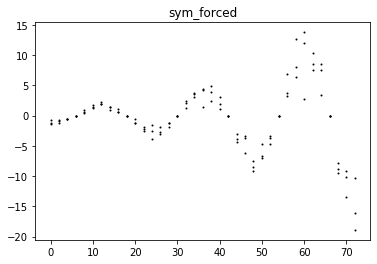

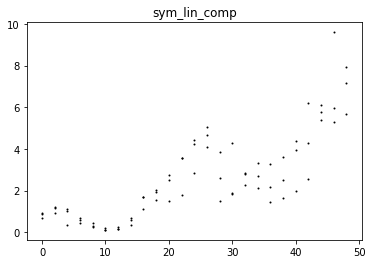

In [3]:
cosinor.plot_data(df)

In [4]:
#file_parser.export(df,"test_data\\independent_data_nonlin.xlsx")

In [5]:
df = file_parser.read_excel("test_data\\independent_data_nonlin.xlsx")

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

In [6]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24, plot=False, plot_phase=False, lin_comp=False)

Get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is p-value)

In [7]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

In [8]:
df_best_models

test  period  n_components             p             q  p_reject  \
0           asym    24.0           3.0  1.110223e-16  2.220446e-16  0.887132   
1    asym_damped    24.0           3.0  1.110223e-16  2.220446e-16  0.279298   
2    asym_forced    24.0           3.0  1.665335e-15  2.664535e-15  0.538257   
3  asym_lin_comp    24.0           2.0  5.657011e-05  7.145698e-05  0.261658   
4            sym    24.0           1.0  1.110223e-16  2.220446e-16  0.996268   
5     sym_damped    24.0           1.0  1.110223e-16  2.220446e-16  0.749029   
6     sym_forced    24.0           1.0  1.110223e-16  2.220446e-16  0.785070   
7   sym_lin_comp    24.0           1.0  3.636053e-04  3.966603e-04  0.714719   

   q_reject          RSS        R2    R2_adj  log-likelihood  amplitude  \
0  0.996268     4.702597  0.931214  0.925144       -2.568895   1.411591   
1  0.744795     6.353659  0.573311  0.548695        1.255538   0.430554   
2  0.996268  2673.986305  0.537455  0.510769     -334.091824   8.229103   
3  0.744795   193.798740  0.294410  0.254090     -142.020343   1.645822   
4  0.996268     3.402873  0.914963  0.912601        9.562157   0.970423   
5  0.996268     4.876230  0.574031  0.566142       15.944083   0.339806   
6  0.996268  1807.506667  0.524890  0.516091     -312.356803   5.923971   
7  0.996268   203.062787  0.197469  0.175176     -143.771407   1.142170   

   acrophase     mesor                                              peaks  \
0   3.138448 -0.520410  [5.861861861861862, 12.012012012012011, 18.210...   
1  -0.163526  0.154213                               [0.6246246246246246]   
2   1.704448 -3.335921  [4.804804804804805, 11.195195195195195, 17.489...   
3   0.383658  2.700327                               [22.534534534534533]   
4   3.125869 -0.003374                                [12.06006006006006]   
5  -0.062895  0.008386                              [0.24024024024024024]   
6  -3.069264 -0.067769                               [11.723723723723724]   
7   0.459132  2.292738                               [22.246246246246248]   

                                             heights  \
0  [0.5728686264257941, 0.8911810134011732, 0.424...   
1                               [0.5847618400094088]   
2  [2.239672628745981, 4.488668256334604, 4.89309...   
3                                [4.346149152173969]   
4                               [0.9670490848958563]   
5                               [0.3481918243190475]   
6                                [5.856164372167978]   
7                               [3.4348872381447553]   

                                             troughs  \
0                                                 []   
1  [6.63063063063063, 12.348348348348349, 18.9789...   
2                               [23.207207207207208]   
3            [6.246246246246246, 15.135135135135135]   
4                              [0.04804804804804805]   
5                               [12.252252252252251]   
6                                [23.68768768768769]   
7                               [10.234234234234235]   

                                            heights2         ME  resid_SE  
0                                                 []   0.524758  0.262975  
1  [-0.22568690397103391, -0.27634042275478765, -...   0.490147  0.247170  
2                              [-11.565023182169945]  10.055273  5.070642  
3             [1.05453027188868, 1.9089482726541867]   3.318538  1.663897  
4                               [-0.973797862442833]   0.433376  0.217399  
5                              [-0.3314146551956685]   0.421184  0.212486  
6                                [-5.99166115885908]   8.109046  4.090987  
7                               [1.1505685529690541]   3.347782  1.679380

... and plot these models

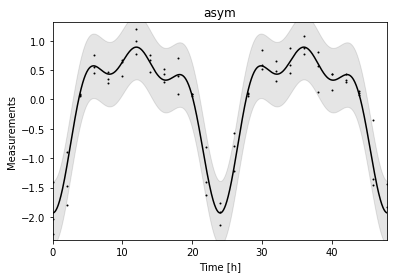

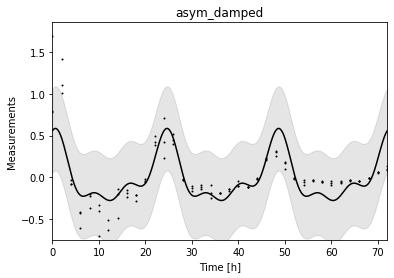

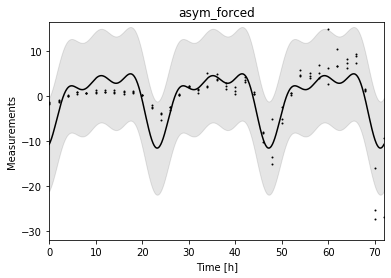

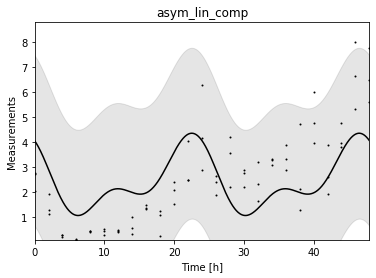

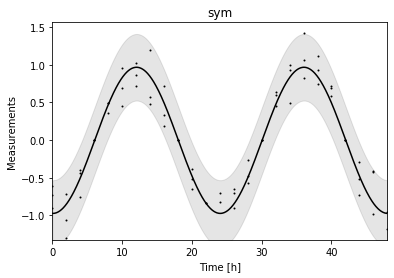

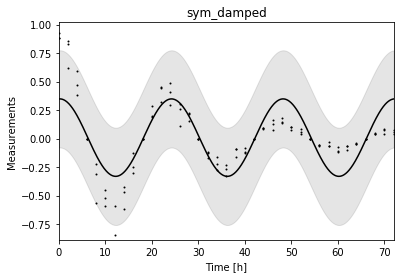

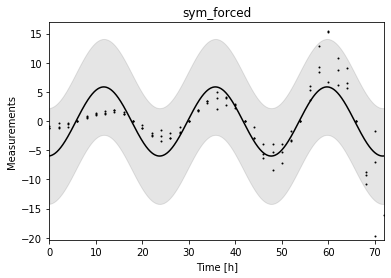

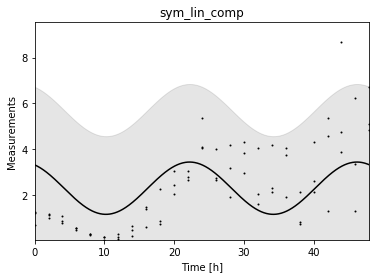

In [9]:
cosinor.plot_df_models(df, df_best_models, plot_phase=False)#, folder="nonlin_basic_models")

We can analyse these models more in details using bootstrap analysis.

In [10]:
df_results_extended = cosinor.analyse_best_models(df, df_best_models)

In [11]:
df_results_extended[['test', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)']].round(3)

test  amplitude  q(amplitude)  acrophase  q(acrophase)
0           asym      1.412           0.0      3.138         0.000
1    asym_damped      0.431           0.0     -0.164         0.043
2    asym_forced      8.229           0.0      1.704         0.009
3  asym_lin_comp      1.646           0.0      0.384         0.021
4            sym      0.970           0.0      3.126         0.000
5     sym_damped      0.340           0.0     -0.063         0.285
6     sym_forced      5.924           0.0     -3.069         0.000
7   sym_lin_comp      1.142           0.0      0.459         0.074

Obviously, some of these fits could be better by introducing linear component and/or amplification coefficient.

## Generalized cosinor1 analysis

First, we will use a single-component model. Using these functions, only 1-component models can be used, but the statistics can be obtained without boostrapping (so this is faster).

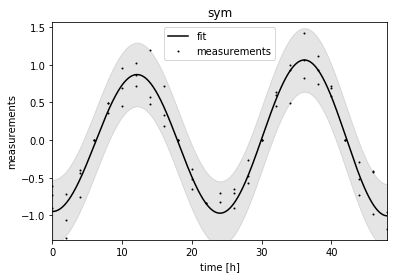

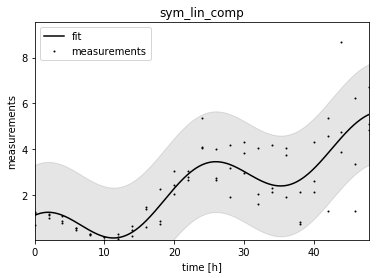

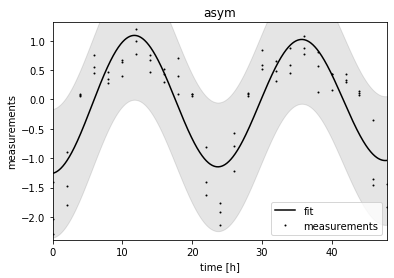

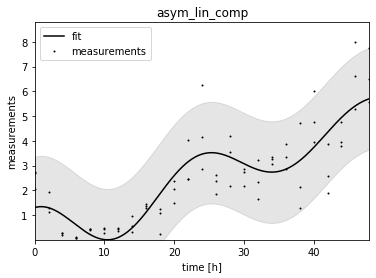

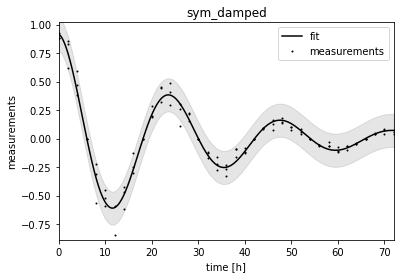

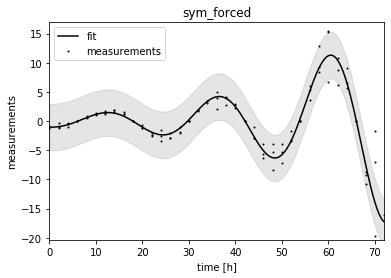

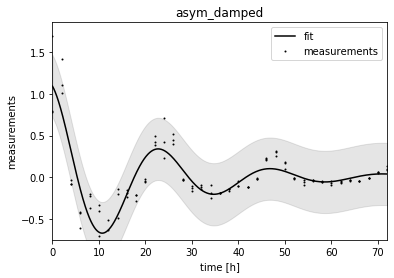

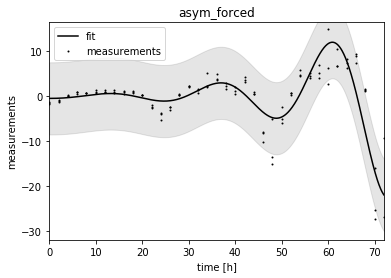

In [12]:
df_results = cosinor_nonlin.fit_generalized_cosinor_group(df, period = 24, plot=True)#, folder="nonlin_gen1_models") 

In [13]:
df_results[['test', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)', 'amplification', 'q(amplification)', 'lin_comp', 'q(lin_comp)']].round(3)

test  amplitude  q(amplitude)  acrophase  q(acrophase)  \
0            sym      0.863         0.000      3.142         0.000   
1   sym_lin_comp      1.071         0.004     -0.174         0.483   
2           asym      1.194         0.000     -3.079         0.000   
3  asym_lin_comp      1.306         0.001      0.016         0.932   
4     sym_damped      0.927         0.000     -0.017         0.599   
5     sym_forced      0.897         0.000     -3.118         0.000   
6    asym_damped      1.127         0.000      0.148         0.044   
7    asym_forced      0.282         0.062     -3.142         0.000   

   amplification  q(amplification)  lin_comp  q(lin_comp)  
0          0.005             0.088     0.003        0.207  
1         -0.001             0.910     0.093        0.000  
2         -0.003             0.624     0.001        0.861  
3         -0.012             0.433     0.103        0.000  
4         -0.037             0.000     0.000        0.675  
5          0.041             0.000     0.009        0.675  
6         -0.050             0.000     0.000        0.675  
7          0.061             0.000     0.015        0.675

## Comparison analysis using generalized cosinor1

The generalised 1-component cosinor model can also be used to compare pairs in a similar way as the basic 1-component model. First we need to define the pairs to compare:

In [14]:
pairs = [("sym", "sym_lin_comp"),("asym", "asym_lin_comp"), ("sym_damped", "sym_forced"), ("asym_damped", "asym_forced")]

Then, we can run the wrapper function that uses the same model:

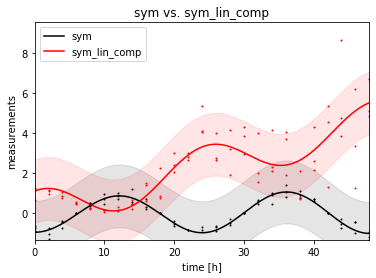

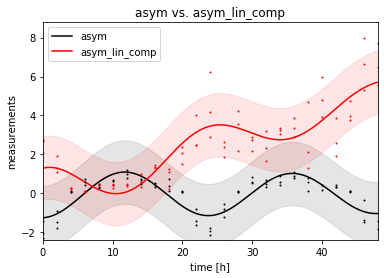

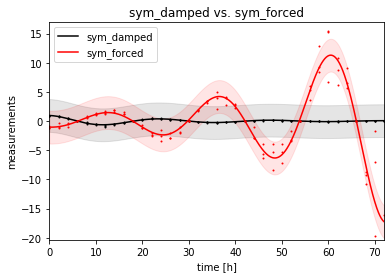

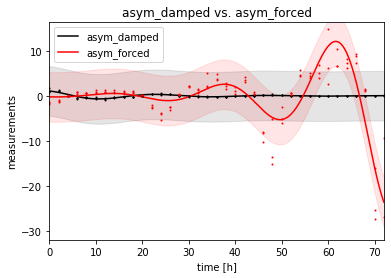

In [15]:
df_results_compare = cosinor_nonlin.fit_generalized_cosinor_compare_pairs_dependent(df, pairs, period=24, plot=True)

In [16]:
df_results_compare

test  period             p             q  \
0         sym vs. sym_lin_comp    24.0  1.110223e-16  1.110223e-16   
1       asym vs. asym_lin_comp    24.0  1.110223e-16  1.110223e-16   
2    sym_damped vs. sym_forced    24.0  1.110223e-16  1.110223e-16   
3  asym_damped vs. asym_forced    24.0  1.110223e-16  1.110223e-16   

   d_amplitude  p(d_amplitude)  q(d_amplitude)  \
0     0.208030        0.547232        0.886666   
1     0.130730        0.741699        0.886666   
2    -0.083906        0.886666        0.886666   
3    -0.910967        0.470417        0.886666   

                             CI(d_amplitude)  d_acrophase  p(d_acrophase)  \
0  [-0.4736075637564384, 0.8896679243894238]     2.967788    0.000000e+00   
1  [-0.6518724128778004, 0.9133332416852835]     3.088088    0.000000e+00   
2  [-1.2429926727866722, 1.0751813155882406]    -3.102978    3.858488e-09   
3  [-3.3943293909574863, 1.5723954550263568]     2.813266    4.698338e-03   

   q(d_acrophase)                             CI(d_acrophase)  \
0    0.000000e+00     [2.572531056630986, 3.3630446342592757]   
1    0.000000e+00     [2.6974205188163864, 3.478754679039855]   
2    5.144651e-09  [-4.0979918731269205, -2.1079649274343657]   
3    4.698338e-03     [0.8724238693311626, 4.754108501507119]   

   d_amplification  p(d_amplification)  q(d_amplification)  \
0        -0.006150            0.626356            0.626356   
1        -0.008885            0.482425            0.626356   
2         0.080141            0.026855            0.107418   
3         0.115691            0.181634            0.363268   

                             CI(d_amplification)  d_lin_comp  p(d_lin_comp)  \
0  [-0.031067831765332368, 0.018768218286154107]    0.089944   3.108624e-15   
1    [-0.0338265504855139, 0.016056679514841438]    0.103402   0.000000e+00   
2     [0.009272383857245117, 0.1510086281193737]    0.008663   3.714126e-01   
3     [-0.05447928867456822, 0.2858618179173289]    0.002617   8.920629e-01   

   q(d_lin_comp)                                 CI(d_lin_comp)  
0   6.217249e-15     [0.06989502281837515, 0.10999263474159043]  
1   0.000000e+00     [0.08256596786578607, 0.12423871706244133]  
2   4.952168e-01  [-0.010400941724201009, 0.027726016439931306]  
3   8.920629e-01  [-0.035353210160672756, 0.040587056730173134]

... or two independent models, which means that each model can be fitted with a different period:

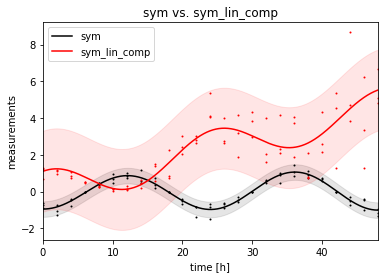

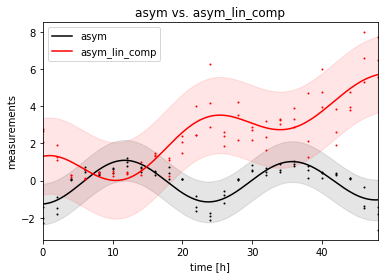

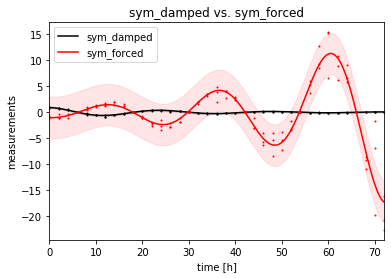

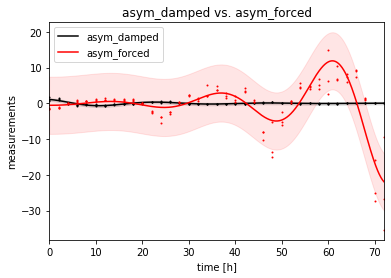

In [17]:
df_results_compare = cosinor_nonlin.fit_generalized_cosinor_compare_pairs_independent(df, pairs, period1=24, period2=24, plot=True)

In [18]:
df_results_compare

test  period1  period2  d_amplitude  p(d_amplitude)  \
0         sym vs. sym_lin_comp     24.0     24.0     0.207991        0.558929   
1       asym vs. asym_lin_comp     24.0     24.0     0.112556        0.780358   
2    sym_damped vs. sym_forced     24.0     24.0    -0.030295        0.862570   
3  asym_damped vs. asym_forced     24.0     24.0    -0.844588        0.000002   

   q(d_amplitude)                             CI(d_amplitude)  d_acrophase  \
0        0.862570   [-0.4939932406425893, 0.9099762043195314]     2.967803   
1        0.862570   [-0.6840023738988944, 0.9091135556433952]     3.094744   
2        0.862570  [-0.37487167549031575, 0.3142821736725786]    -3.100567   
3        0.000007  [-1.1837566657460332, -0.5054198629926696]     2.993887   

   p(d_acrophase)  q(d_acrophase)                             CI(d_acrophase)  \
0             0.0             0.0      [2.58518928448936, 3.3504166232185515]   
1             0.0             0.0      [2.694554664902137, 3.494933578101721]   
2             0.0             0.0  [-3.1967597276170014, -3.0043736295915764]   
3             0.0             0.0    [2.7868077915521887, 3.2009667642228745]   

   d_amplification  p(d_amplification)  q(d_amplification)  \
0        -0.006148            0.615523            0.615523   
1        -0.008220            0.527604            0.615523   
2         0.077985            0.000000            0.000000   
3         0.111129            0.000000            0.000000   

                             CI(d_amplification)  d_lin_comp  p(d_lin_comp)  \
0  [-0.030300570699506195, 0.018004029608832024]    0.089943   3.108624e-15   
1    [-0.03388582225400279, 0.01744581861912345]    0.102287   0.000000e+00   
2     [0.07097345099800974, 0.08499619732862972]    0.008803   3.646725e-01   
3     [0.09159687308037692, 0.13066015631917233]    0.014471   4.697498e-01   

   q(d_lin_comp)                                 CI(d_lin_comp)  
0   6.217249e-15     [0.06990846767277002, 0.10997787657854831]  
1   0.000000e+00      [0.0814398348090664, 0.12313389920976887]  
2   4.697498e-01   [-0.010298808821265357, 0.02790444553029459]  
3   4.697498e-01  [-0.024921038489691412, 0.053864037121703824]

## Generalized multicomponent cosinor analysis
A better fit would be obtained in some cases (e.g., test7 and test8) if a multicomponent cosinor model would be used. 

We can use a wrapper function that automatically identifies the optimal number of components for each dataset, and plots and stores the results in a data frame.

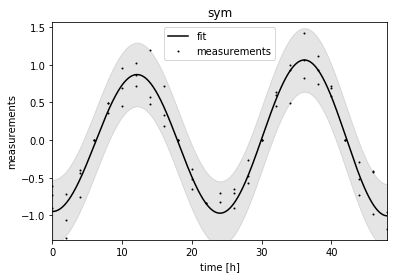

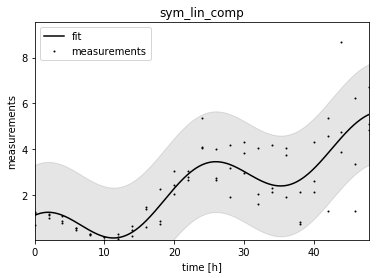

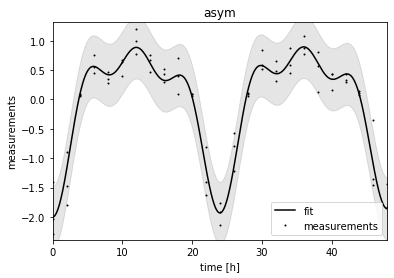

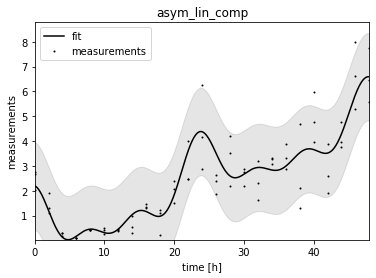

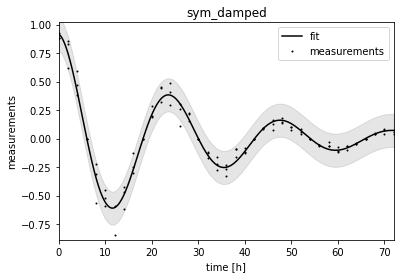

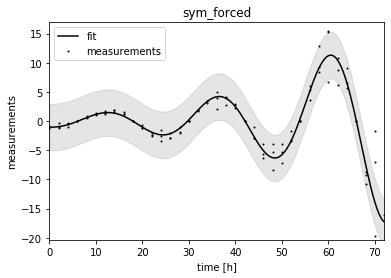

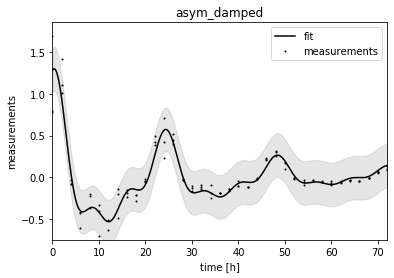

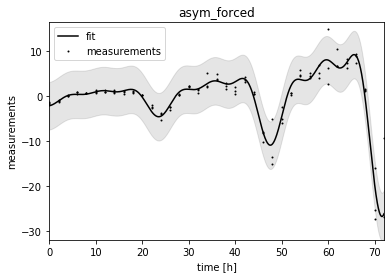

In [19]:
df_best_models = cosinor_nonlin.fit_generalized_cosinor_n_comp_group_best(df, period=24, n_components = [1,2,3], plot=True)#, folder="nonlin_gen_models") 

In [20]:
df_best_models[['test', 'n_components']]

test  n_components
0            sym           1.0
1   sym_lin_comp           1.0
2           asym           3.0
3  asym_lin_comp           3.0
4     sym_damped           1.0
5     sym_forced           1.0
6    asym_damped           3.0
7    asym_forced           3.0

In [21]:
df_best_models

test  period  n_components             p             q  \
0            sym    24.0           1.0  1.110223e-16  1.268826e-16   
1   sym_lin_comp    24.0           1.0  6.661338e-16  6.661338e-16   
2           asym    24.0           3.0  1.110223e-16  1.268826e-16   
3  asym_lin_comp    24.0           3.0  1.110223e-16  1.268826e-16   
4     sym_damped    24.0           1.0  1.110223e-16  1.268826e-16   
5     sym_forced    24.0           1.0  1.110223e-16  1.268826e-16   
6    asym_damped    24.0           3.0  1.110223e-16  1.268826e-16   
7    asym_forced    24.0           3.0  1.110223e-16  1.268826e-16   

          RSS  amplitude  acrophase     mesor  \
0    3.154412   0.862770   3.138448 -0.085299   
1   85.252168   1.070762  -0.176105  0.050780   
2    4.658388   1.442194   3.138448 -0.559778   
3   51.212062   1.587876   0.094342  0.647528   
4    0.571337   0.927070  -0.012579 -0.010009   
5  430.730041   0.896775  -3.119579 -0.141673   
6    1.767559   1.053529  -0.138368  0.264037   
7  721.307107   1.407823  -2.981211 -0.865149   

                                               peaks  ...  \
0                               [12.012012012012011]  ...   
1                               [0.6726726726726726]  ...   
2  [5.861861861861862, 12.012012012012011, 18.162...  ...   
3                                [23.63963963963964]  ...   
4                              [0.04804804804804805]  ...   
5                               [11.915915915915916]  ...   
6                               [0.5285285285285285]  ...   
7  [5.381381381381381, 11.387387387387387, 17.393...  ...   

                                             troughs  \
0                                                 []   
1                               [12.684684684684685]   
2                               [23.975975975975977]   
3  [5.237237237237237, 11.243243243243244, 18.114...   
4                                [12.06006006006006]   
5                                [23.92792792792793]   
6  [6.678678678678678, 12.3003003003003, 18.69069...   
7                                 [23.3993993993994]   

                                            heights2 amplification  \
0                                                 []      0.004788   
1                              [-1.0199662702640757]     -0.001360   
2                               [-2.001850238033429]     -0.000902   
3  [-0.4927654514825059, -0.8695369096439735, -0....     -0.005274   
4                              [-0.9370789826313877]     -0.036508   
5                              [-1.0384371004315247]      0.041476   
6  [-0.5093380994992068, -0.7894795391947516, -0....     -0.033709   
7                              [-2.2729715642523467]      0.036752   

   p(amplification)  q(amplification)  \
0          0.055302          0.088484   
1          0.909855          0.909855   
2          0.672236          0.768270   
3          0.456622          0.608829   
4          0.000000          0.000000   
5          0.000000          0.000000   
6          0.000000          0.000000   
7          0.000000          0.000000   

                                CI(amplification)  lin_comp   p(lin_comp)  \
0  [-0.00011160240822076506, 0.00968819248321229]  0.003433  7.758087e-02   
1   [-0.025230046049080943, 0.022510095033398295]  0.093376  5.262457e-14   
2   [-0.005140668519573382, 0.003336308993068069]  0.001193  6.313676e-01   
3       [-0.019334909508832765, 0.00878741138995]  0.101660  0.000000e+00   
4    [-0.04012389572463813, -0.03289297478955026]  0.000200  5.696274e-01   
5    [0.035421428075016914, 0.047531349737434156]  0.009003  3.546929e-01   
6  [-0.039332310470096304, -0.028084813852797944]  0.001204  6.109422e-02   
7     [0.030488670032487574, 0.04301616515508209]  0.016705  1.987559e-01   

    q(lin_comp)                                    CI(lin_comp)  
0  1.551617e-01  [-0.0003895082816313838, 0.007255991432152397]  
1  2.104983e-13       [0.0735277245414441, 0.113225102860

Alternatively, we can also fix the number of components to the same value for all datasets:

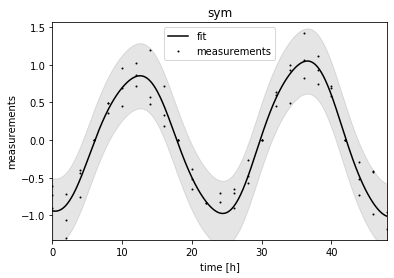

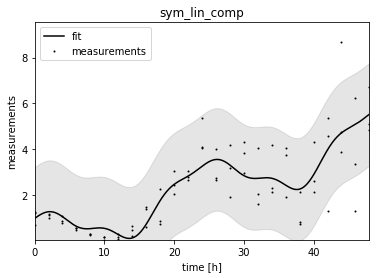

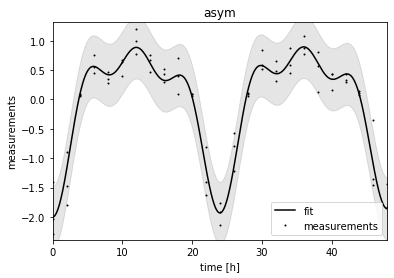

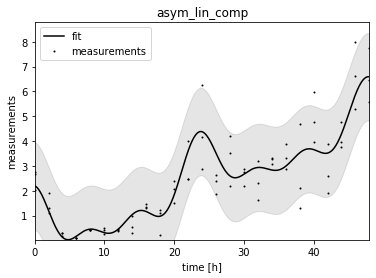

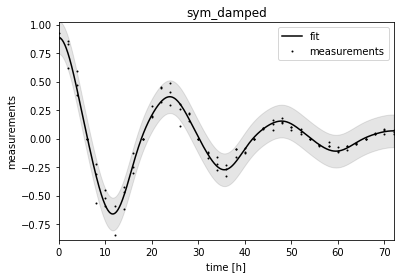

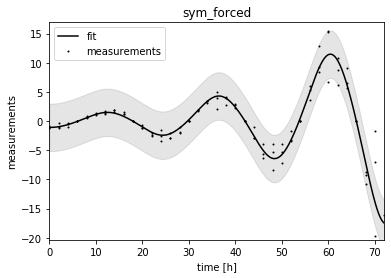

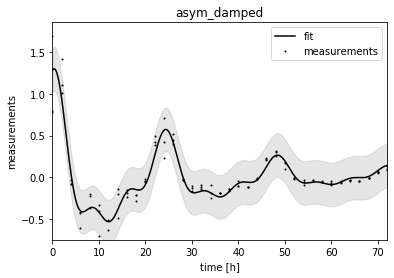

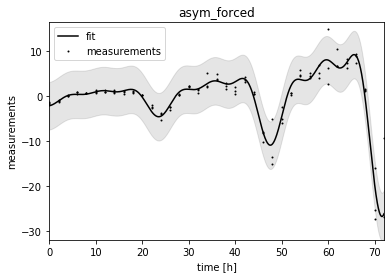

In [22]:
df_3comp_models = cosinor_nonlin.fit_generalized_cosinor_n_comp_group(df, period=24, n_components = 3, plot=True)

In [23]:
df_3comp_models

test  period  n_components             p             q  \
0            sym    24.0           3.0  1.110223e-16  1.268826e-16   
1   sym_lin_comp    24.0           3.0  2.564615e-13  2.564615e-13   
2           asym    24.0           3.0  1.110223e-16  1.268826e-16   
3  asym_lin_comp    24.0           3.0  1.110223e-16  1.268826e-16   
4     sym_damped    24.0           3.0  1.110223e-16  1.268826e-16   
5     sym_forced    24.0           3.0  1.110223e-16  1.268826e-16   
6    asym_damped    24.0           3.0  1.110223e-16  1.268826e-16   
7    asym_forced    24.0           3.0  1.110223e-16  1.268826e-16   

          RSS  amplitude  acrophase     mesor  \
0    3.109299   0.850474   3.025237 -0.092968   
1   83.178613   1.109335  -0.402526 -0.020284   
2    4.658388   1.442194   3.138448 -0.559778   
3   51.212062   1.587876   0.094342  0.647528   
4    0.534807   0.955945  -0.088053 -0.062931   
5  429.630618   0.923730  -3.119579 -0.148790   
6    1.767559   1.053529  -0.138368  0.264037   
7  721.307107   1.407823  -2.981211 -0.865149   

                                               peaks  ...  \
0                               [12.444444444444445]  ...   
1                               [1.5375375375375375]  ...   
2  [5.861861861861862, 12.012012012012011, 18.162...  ...   
3                                [23.63963963963964]  ...   
4                               [0.3363363363363363]  ...   
5                               [11.915915915915916]  ...   
6                               [0.5285285285285285]  ...   
7  [5.381381381381381, 11.387387387387387, 17.393...  ...   

                                             troughs  \
0                               [0.3843843843843844]   
1                               [13.981981981981981]   
2                               [23.975975975975977]   
3  [5.237237237237237, 11.243243243243244, 18.114...   
4                               [12.012012012012011]   
5                                [23.92792792792793]   
6  [6.678678678678678, 12.3003003003003, 18.69069...   
7                                 [23.3993993993994]   

                                            heights2 amplification  \
0                              [-0.9434427756167493]      0.005048   
1                              [-1.1295867840032199]      0.002645   
2                               [-2.001850238033429]     -0.000902   
3  [-0.4927654514825059, -0.8695369096439735, -0....     -0.005274   
4                                [-1.01885342658976]     -0.036740   
5                              [-1.0725112467001126]      0.041249   
6  [-0.5093380994992068, -0.7894795391947516, -0....     -0.033709   
7                              [-2.2729715642523467]      0.036752   

   p(amplification)  q(amplification)  \
0          0.059279          0.094847   
1          0.835436          0.835436   
2          0.672236          0.768270   
3          0.456622          0.608829   
4          0.000000          0.000000   
5          0.000000          0.000000   
6          0.000000          0.000000   
7          0.000000          0.000000   

                                CI(amplification)  lin_comp   p(lin_comp)  \
0  [-0.0002033849205052094, 0.010299351549417097]  0.003353  9.385759e-02   
1    [-0.022672036985097337, 0.02796106853051316]  0.092376  2.744471e-13   
2   [-0.005140668519573382, 0.003336308993068069]  0.001193  6.313676e-01   
3       [-0.019334909508832765, 0.00878741138995]  0.101660  0.000000e+00   
4   [-0.04066301060268473, -0.032816434183546746]  0.000183  5.996946e-01   
5     [0.034792275478892826, 0.04770495023373267]  0.009335  3.483715e-01   
6  [-0.039332310470096304, -0.028084813852797944]  0.001204  6.109422e-02   
7     [0.030488670032487574, 0.04301616515508209]  0.016705  1.987559e-01   

    q(lin_comp)                                     CI(lin_comp)  
0  1.877152e-01    [-0.0005851806610346201, 0.00729150326806606]  
1  1.097789e-12       [0.07213635477111897, 0.112615672

However, the significance of amplitudes and acrophases being different than zero now needs to be evaluated using bootstrap.

We can do this using the best models for each dataset:

In [24]:
df_bootstrap = cosinor_nonlin.bootstrap_generalized_cosinor_n_comp_group_best(df, df_best_models, bootstrap_size=100)

In [25]:
df_bootstrap[['test', 'n_components', 'amplitude', 'q(amplitude)', 'acrophase', 'q(acrophase)', 'amplification', 'q(amplification)', 'lin_comp', 'q(lin_comp)']].round(3)

test  n_components  amplitude  q(amplitude)  acrophase  \
0            sym           1.0      0.863           0.0      3.138   
1   sym_lin_comp           1.0      1.071           0.0     -0.176   
2           asym           3.0      1.442           0.0      3.138   
3  asym_lin_comp           3.0      1.588           0.0      0.094   
4     sym_damped           1.0      0.927           0.0     -0.013   
5     sym_forced           1.0      0.897           0.0     -3.120   
6    asym_damped           3.0      1.054           0.0     -0.138   
7    asym_forced           3.0      1.408           0.0     -2.981   

   q(acrophase)  amplification  q(amplification)  lin_comp  q(lin_comp)  
0         0.000          0.005             0.088     0.003        0.155  
1         0.360         -0.001             0.910     0.093        0.000  
2         0.000         -0.001             0.768     0.001        0.631  
3         0.354         -0.005             0.609     0.102        0.000  
4         0.476         -0.037             0.000     0.000        0.631  
5         0.000          0.041             0.000     0.009        0.473  
6         0.075         -0.034             0.000     0.001        0.155  
7         0.001          0.037             0.000     0.017        0.318

Alternatively, we can also fix the number of components to the same value for all the datasets:

In [26]:
df_bootstrap3 = cosinor_nonlin.bootstrap_generalized_cosinor_n_comp_group(df, period=24, n_components=3, bootstrap_size=100)

In [27]:
df_bootstrap3

test  period  n_components             p             q  amplitude  \
0            sym    24.0           3.0  1.110223e-16  1.268826e-16   0.850474   
1   sym_lin_comp    24.0           3.0  2.564615e-13  2.564615e-13   1.109335   
2           asym    24.0           3.0  1.110223e-16  1.268826e-16   1.442194   
3  asym_lin_comp    24.0           3.0  1.110223e-16  1.268826e-16   1.587876   
4     sym_damped    24.0           3.0  1.110223e-16  1.268826e-16   0.955945   
5     sym_forced    24.0           3.0  1.110223e-16  1.268826e-16   0.923730   
6    asym_damped    24.0           3.0  1.110223e-16  1.268826e-16   1.053529   
7    asym_forced    24.0           3.0  1.110223e-16  1.268826e-16   1.407823   

   p(amplitude)  q(amplitude)                              CI(amplitude)  \
0  0.000000e+00  0.000000e+00   [0.7124904907588637, 1.0020152511019746]   
1  3.009843e-02  3.009843e-02  [0.08774381187821623, 1.6947131353891858]   
2  0.000000e+00  0.000000e+00     [1.185541613166353, 1.650831826907715]   
3  1.591292e-06  2.121722e-06    [0.9703289906596293, 2.194487418066428]   
4  0.000000e+00  0.000000e+00   [0.8292695061434768, 1.0320711523474866]   
5  8.431710e-07  1.349074e-06   [0.5551441002943408, 1.2230449243627572]   
6  2.422202e-09  4.844404e-09   [0.7598086650611822, 1.4109846833861206]   
7  1.417813e-04  1.620358e-04   [0.6852350468660643, 2.0554253922978187]   

   acrophase  ...  q(acrophase)  \
0   3.025237  ...      0.000000   
1  -0.402526  ...      0.846411   
2   3.138448  ...      0.000000   
3   0.094342  ...      0.381939   
4  -0.088053  ...      0.696395   
5  -3.119579  ...      0.000000   
6  -0.138368  ...      0.072815   
7  -2.981211  ...      0.001629   

                                   CI(acrophase) amplification  \
0        [2.8037015484605257, 3.298559254130097]      0.005048   
1      [-1.4181974245022069, 1.1655286090657668]      0.002645   
2      [-3.540497978291424, -2.7127352643153415]     -0.000902   
3    [-0.07684829621731076, 0.25712189125705237]     -0.005274   
4     [-0.3484704707096062, 0.20547051123408705]     -0.036740   
5     [-3.4526536002686625, -2.7663868923932085]      0.041249   
6  [-0.25002545670028486, -0.002577447620322443]     -0.033709   
7        [1.1825583580983492, 4.362810970950954]      0.036752   

   p(amplification)  q(amplification)  \
0          0.059279          0.094847   
1          0.835436          0.835436   
2          0.672236          0.768270   
3          0.456622          0.608829   
4          0.000000          0.000000   
5          0.000000          0.000000   
6          0.000000          0.000000   
7          0.000000          0.000000   

                                CI(amplification)  lin_comp   p(lin_comp)  \
0  [-0.0002033849205052094, 0.010299351549417097]  0.003353  9.385759e-02   
1    [-0.022672036985097337, 0.02796106853051316]  0.092376  2.744471e-13   
2   [-0.005140668519573382, 0.003336308993068069]  0.001193  6.313676e-01   
3       [-0.019334909508832765, 0.00878741138995]  0.101660  0.000000e+00   
4   [-0.04066301060268473, -0.032816434183546746]  0.000183  5.996946e-01   
5     [0.034792275478892826, 0.04770495023373267]  0.009335  3.483715e-01   
6  [-0.039332310470096304, -0.028084813852797944]  0.001204  6.109422e-02   
7     [0.030488670032487574, 0.04301616515508209]  0.016705  1.987559e-01   

    q(lin_comp)                                     CI(lin_comp)  
0  1.877152e-01    [-0.0005851806610346201, 0.00729150326806606]  
1  1.097789e-12       [0.07213635477111897, 0.11261567249635311]  
2  6.313676e-01    [-0.003748388480736323, 0.006134491578702058]  
3  0.000000e+00       [0.08524571781276978, 0.11807383059664552]  
4  6.313676e-01  [-0.0005075778938814918, 0.0008744000937996122]  
5  4.644953e-01     [-0.01031875983959316, 0.028988226583688114]  
6  1.629179e-01   [-5.708676715342328e-05, 0.002465777875954703]  
7  3.180094e-01     [-0.008910551438009076, 0.04231974232870428]  

[8 rows x 21 colum

## Comparison using generalized multicomponent cosinor analysis
This analysis relies on the bootsrapping as in the basic multicomponent cosinor analysis. However, it is not necessary to run bootstrap again, since we can use the results produced in previous steps. Namely, we will use the confidence intervals of the basic bootstrap analyses.

First, we need to define the pairs to compare:

In [28]:
pairs = [("sym", "sym_lin_comp"),("asym", "asym_lin_comp"), ("sym_damped", "sym_forced"), ("asym_damped", "asym_forced")]

Then, we can run the analysis. To reduce the computing time, we can specify the bootstrap results obtained earlier (`df_bootstrap_single` parameter).

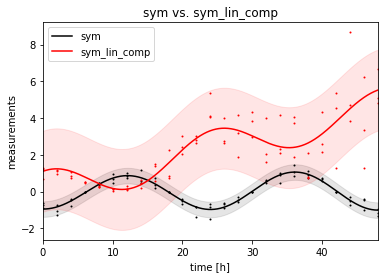

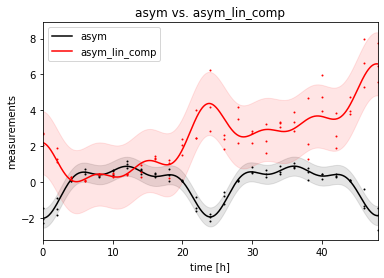

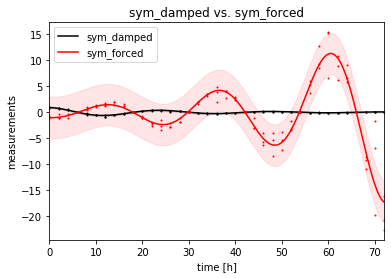

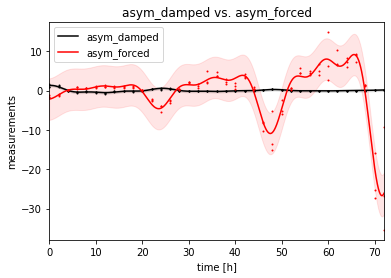

In [29]:
df_bootstrap_compare = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, df_best_models=df_best_models, df_bootstrap_single=df_bootstrap, plot=True)#, folder="nonlin_gen_compare")

In [30]:
df_bootstrap_compare[['test', 'n_components1', 'n_components2', 'd_amplitude', 'q(d_amplitude)', 'd_acrophase', 'q(d_acrophase)', 'd_amplification', 'q(d_amplification)', 'd_lin_comp', 'q(d_lin_comp)']].round(3)

test  n_components1  n_components2  d_amplitude  \
0         sym vs. sym_lin_comp            1.0            1.0        0.208   
1       asym vs. asym_lin_comp            3.0            3.0        0.146   
2    sym_damped vs. sym_forced            1.0            1.0       -0.030   
3  asym_damped vs. asym_forced            3.0            3.0        0.354   

   q(d_amplitude)  d_acrophase  q(d_acrophase)  d_amplification  \
0           0.745        2.969             0.0           -0.006   
1           0.887       -3.044             0.0           -0.004   
2           0.887       -3.107             0.0            0.078   
3           0.745       -2.843             0.0            0.070   

   q(d_amplification)  d_lin_comp  q(d_lin_comp)  
0               0.616       0.090          0.000  
1               0.616       0.100          0.000  
2               0.000       0.009          0.365  
3               0.000       0.016          0.309

If this argument is not specified (or if a certain measurement is missing), bootstrap is ran (again) on individual fits.

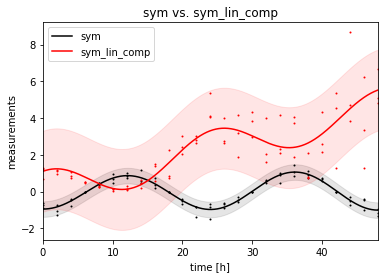

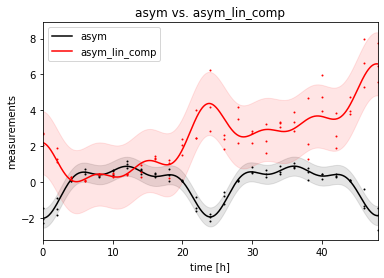

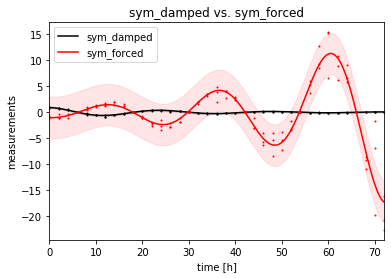

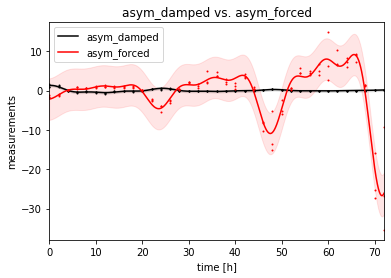

In [31]:
df_bootstrap_compare2 = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, df_best_models=df_best_models, bootstrap_size=100, plot=True)

In [32]:
df_bootstrap_compare2

test  period1  period2  n_components1  \
0         sym vs. sym_lin_comp     24.0     24.0            1.0   
1       asym vs. asym_lin_comp     24.0     24.0            3.0   
2    sym_damped vs. sym_forced     24.0     24.0            1.0   
3  asym_damped vs. asym_forced     24.0     24.0            3.0   

   n_components2  d_amplitude  p(d_amplitude)  q(d_amplitude)  \
0            1.0     0.207992        0.217443        0.723884   
1            3.0     0.145682        0.668023        0.881204   
2            1.0    -0.030295        0.881204        0.881204   
3            3.0     0.354294        0.361942        0.723884   

                              CI(d_amplitude)  d_acrophase  ...  \
0  [-0.12354972370726408, 0.5395337147511934]     2.968632  ...   
1    [-0.523470442556248, 0.8148338069451582]    -3.044106  ...   
2  [-0.4296237130344717, 0.36903418856635434]    -3.107001  ...   
3   [-0.4105585113961109, 1.1191467671677513]    -2.842843  ...   

   q(d_acrophase)                             CI(d_acrophase) d_amplification  \
0        0.000000    [2.6404136173055752, 3.2968505768661256]       -0.006148   
1        0.000000  [-3.5559393817619034, -2.5322722071768755]       -0.004372   
2        0.000000  [-3.1929171562486167, -3.0210839283293924]        0.077985   
3        0.000382   [-4.392321138535119, -1.2933640643581192]        0.070461   

   p(d_amplification)  q(d_amplification)  \
0            0.615523            0.615523   
1            0.553222            0.615523   
2            0.000000            0.000000   
3            0.000000            0.000000   

                             CI(d_amplification) d_lin_comp  p(d_lin_comp)  \
0  [-0.030300570699506195, 0.018004029608832024]   0.089943   3.108624e-15   
1  [-0.018919717323402002, 0.010176578731024554]   0.100467   0.000000e+00   
2     [0.07097345099800974, 0.08499619732862972]   0.008803   3.646725e-01   
3     [0.06201807969932896, 0.07890387981113495]   0.015500   2.319546e-01   

   q(d_lin_comp)                                CI(d_lin_comp)  
0   6.217249e-15    [0.06990846767277002, 0.10997787657854831]  
1   0.000000e+00    [0.08348598617694836, 0.11744745913450119]  
2   3.646725e-01  [-0.010298808821265357, 0.02790444553029459]  
3   3.092727e-01  [-0.009991398684926343, 0.04099189846682027]  

[4 rows x 21 columns]

Above, the parameters of the best models were identified using the `df_best_models` argument. If this is not specified `n_components` is used for all the fits.

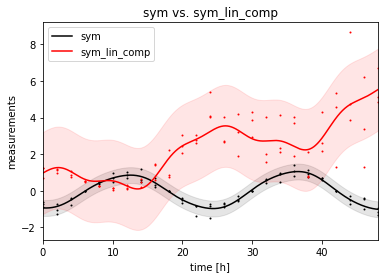

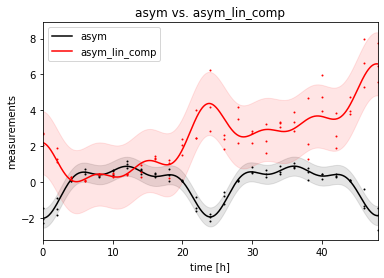

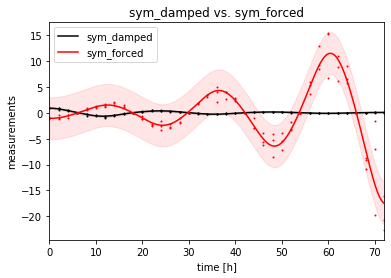

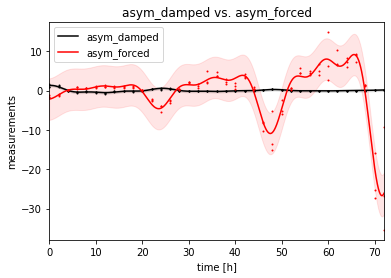

In [33]:
df_bootstrap_compare3 = cosinor_nonlin.compare_pairs_n_comp_bootstrap_group(df, pairs, n_components=3, period=24, bootstrap_size=100, plot=True)

In [34]:
df_bootstrap_compare3

test  period1  period2  n_components1  \
0         sym vs. sym_lin_comp     24.0     24.0            3.0   
1       asym vs. asym_lin_comp     24.0     24.0            3.0   
2    sym_damped vs. sym_forced     24.0     24.0            3.0   
3  asym_damped vs. asym_forced     24.0     24.0            3.0   

   n_components2  d_amplitude  p(d_amplitude)  q(d_amplitude)  \
0            3.0     0.258861        0.566439        0.862503   
1            3.0     0.145682        0.650818        0.862503   
2            3.0    -0.032215        0.862503        0.862503   
3            3.0     0.354294        0.334747        0.862503   

                              CI(d_amplitude)  d_acrophase  ...  \
0    [-0.630410764833597, 1.1481327275557422]     2.855422  ...   
1   [-0.4883229896150375, 0.7796863540039477]    -3.044106  ...   
2   [-0.3987087611708879, 0.3342790022624393]    -3.031527  ...   
3  [-0.36849318222246863, 1.0770814379941092]    -2.842843  ...   

   q(d_acrophase)                             CI(d_acrophase) d_amplification  \
0        0.000030     [1.5616020760900076, 4.149241025931079]       -0.002403   
1        0.000000    [-3.239139458282847, -2.849072130655932]       -0.004372   
2        0.000000  [-3.4803108641904594, -2.5827428256204716]        0.077988   
3        0.000404    [-4.39912132660488, -1.2865638762883582]        0.070461   

   p(d_amplification)  q(d_amplification)  \
0            0.853009            0.853009   
1            0.553222            0.737630   
2            0.000000            0.000000   
3            0.000000            0.000000   

                             CI(d_amplification) d_lin_comp  p(d_lin_comp)  \
0  [-0.028016086187383847, 0.023209151103887778]   0.089023   1.953993e-14   
1  [-0.018919717323402002, 0.010176578731024554]   0.100467   0.000000e+00   
2      [0.07047896182291646, 0.0854977086759405]   0.009151   3.570455e-01   
3     [0.06201807969932896, 0.07890387981113495]   0.015500   2.319546e-01   

   q(d_lin_comp)                                CI(d_lin_comp)  
0   3.907985e-14    [0.06859724167725996, 0.10944846298318069]  
1   0.000000e+00    [0.08348598617694836, 0.11744745913450119]  
2   3.570455e-01     [-0.010395812577683166, 0.02869845712186]  
3   3.092727e-01  [-0.009991398684926343, 0.04099189846682027]  

[4 rows x 21 columns]